In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import gc
import pandas as pd
import numpy as np
import torch
import datetime
from tqdm import tqdm_notebook
from torch import nn
from torchvision import transforms
from cnn_finetune import make_model

import model as M
from dataset import SegmentationDataset
from data import *
from util import *

In [92]:
torch.cuda.is_available()
device = torch.device('cuda')

# U-Net testing

In [93]:
_, val_df, test_df = get_dfs()

In [94]:
gc.collect()
torch.cuda.empty_cache()

model = M.UNet(1, n_classes=1)
weight = torch.load(str(model_dir / 'unet_test_dict.model'))
model.load_state_dict(weight)
model = model.to(device)

In [108]:
val_dataset = SegmentationDataset(val_df, mode='val').set_transformer()
test_dataset = SegmentationDataset(test_df, mode='test').set_transformer()

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


(1, 101, 303)


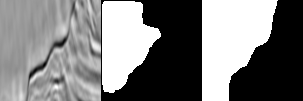

In [131]:
im, mask = val_dataset[10]
pred = predict(model, im, device)
show_prediction(im, pred, mask)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


(1, 101, 303)


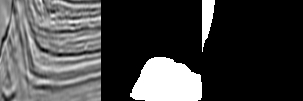

In [130]:
im, mask = val_dataset[15]
pred = predict(model, im, device)
show_prediction(im, pred, mask)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


(1, 101, 303)


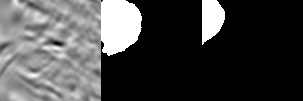

In [132]:
im, mask = val_dataset[20]
pred = predict(model, im, device)
show_prediction(im, pred, mask)

In [137]:
val_iter = iter(val_loader)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


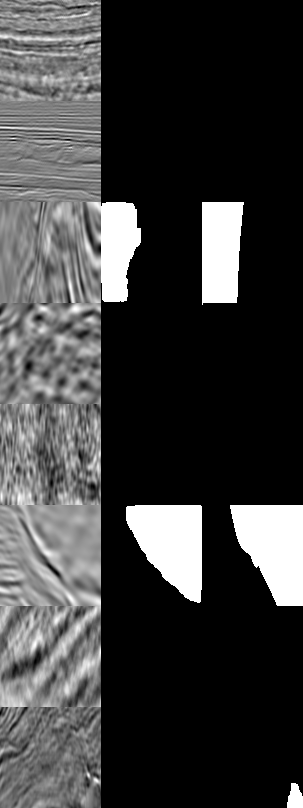

In [138]:
data, target = next(val_iter)
pred = predict(model, data, device)
show_prediction(data, pred, target)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


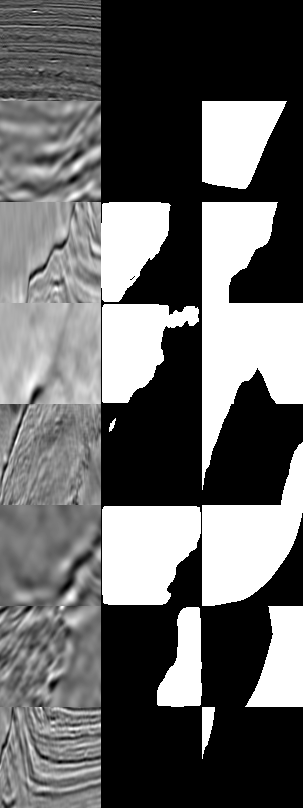

In [139]:
data, target = next(val_iter)
pred = predict(model, data, device)
show_prediction(data, pred, target)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


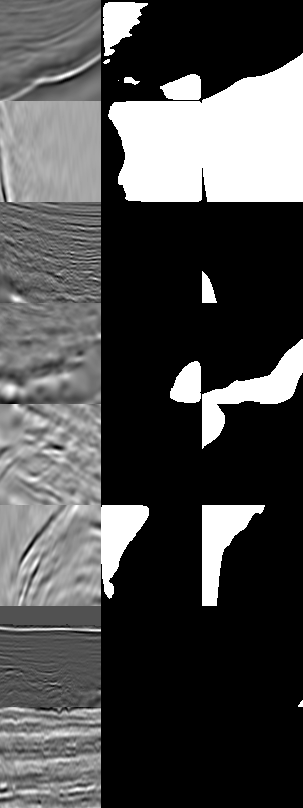

In [140]:
data, target = next(val_iter)
pred = predict(model, data, device)
show_prediction(data, pred, target)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


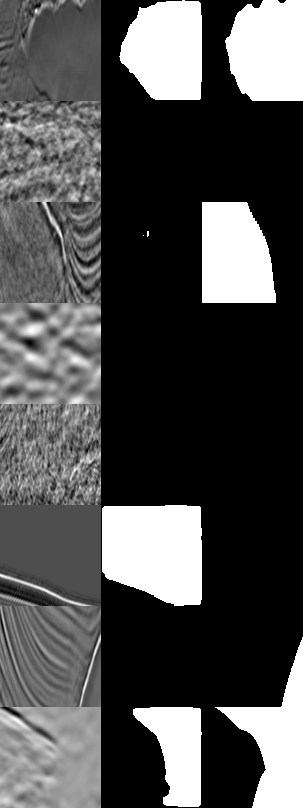

In [141]:
data, target = next(val_iter)
pred = predict(model, data, device)
show_prediction(data, pred, target)